### Importing all necessary libraries

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from scipy.stats import shapiro
from sklearn.preprocessing import PolynomialFeatures
# from sklearn.linear_model import LinearRegression

In [174]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
df = pd.read_csv('/content/drive/My Drive/Documents/DataScience/Jamboree_Admission.csv')
df = pd.DataFrame(df)

### Exploratory Data Analysis

In [176]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [177]:
df.drop('Serial No.', axis = 1, inplace = True) # Dropping serial number as it irrelevant column.

In [178]:
df.shape

(500, 8)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [180]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


### Null value detection

In [181]:
df.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


**Insight:**
Null values are not present.

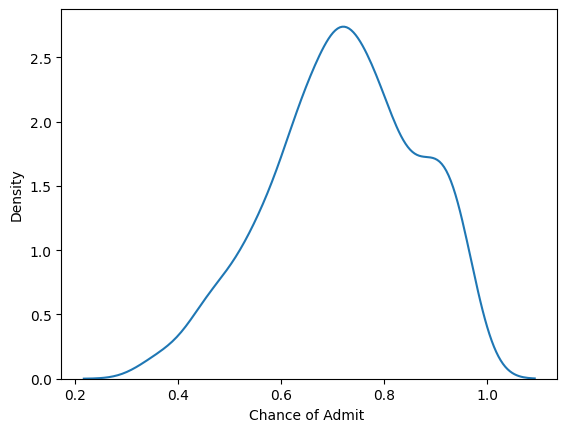

In [182]:
# Checking the distribution of target column
sns.kdeplot(data=df['Chance of Admit '])
plt.show()

**Insights:**


*   Target Column lies in the range (0, 1)
*   Categorical columns are University ranking, SOP, LOR, and Research.
* Numerical Columns are CGPA, GRE Score, and TOEFL Score








### Univariate Analysis

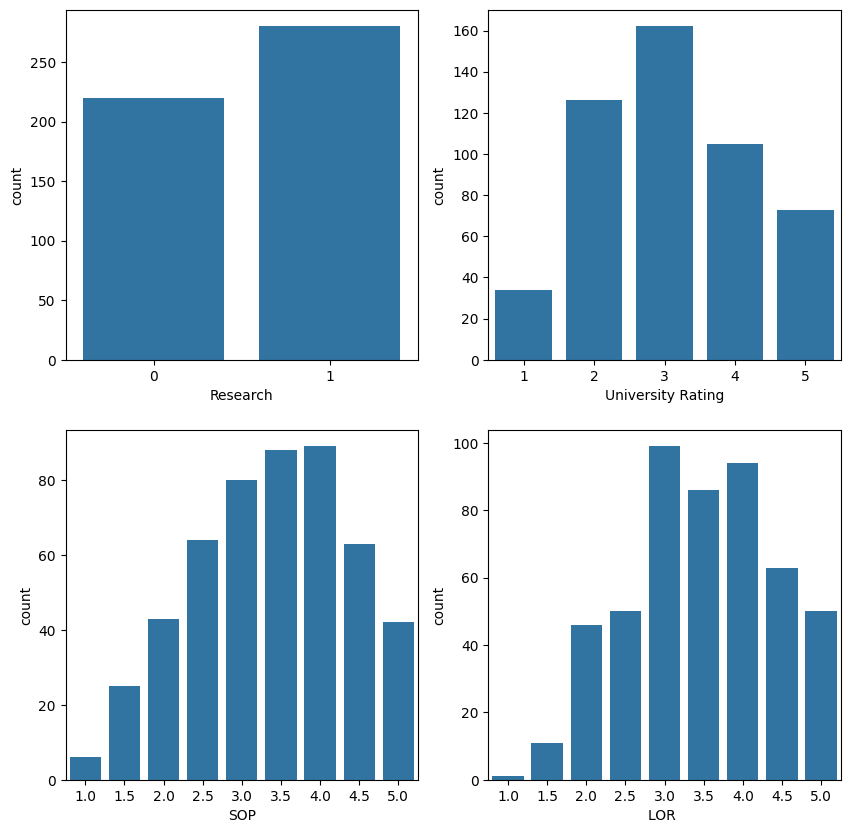

In [183]:
# Univariate Analysis of Categorical columns

Categorical_cols = ['Research', 'University Rating', 'SOP', 'LOR ']
num_plots = len(Categorical_cols)
num_cols = 2
num_rows = (num_plots + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 5 * num_rows))
axes = axes.flatten()
for i, col in enumerate(Categorical_cols):
  sns.countplot(x = col, data = df, ax = axes[i])

plt.show()


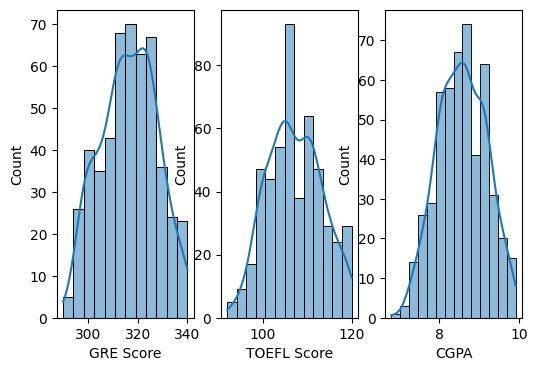

In [184]:
# Univariate analysis of Numerical columns
numerical_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
num_plots = len(numerical_cols)
num_cols = 3
num_rows = 1

fig, axes = plt.subplots(num_rows, num_cols, figsize = (6, 4))
for i, col in enumerate(numerical_cols):
  sns.histplot(x = col, data = df, ax = axes[i], kde = True)


plt.show()

### Bivariate Analysis

#### Correlation matrix

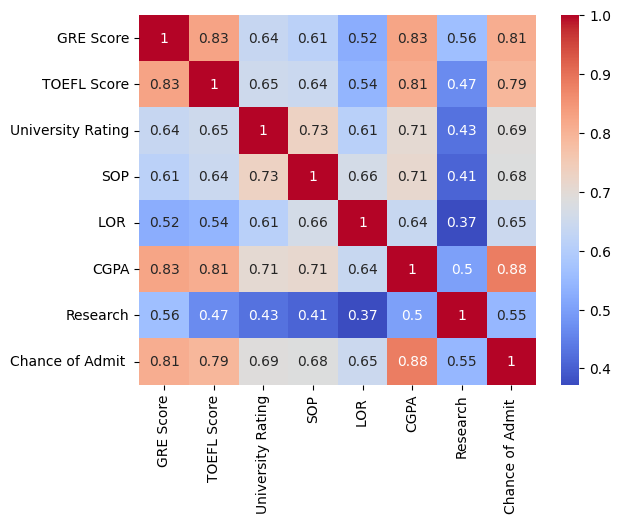

In [185]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()


**Insight:**

*  Chance of Admit highly +ve correlated to CGPA, GRE Score, TOEFL Score.
*   University Rating, SOP, and LOR have little impact on Chance of Admit.
*  Whereas, Chance of Admit depends less likely on Research



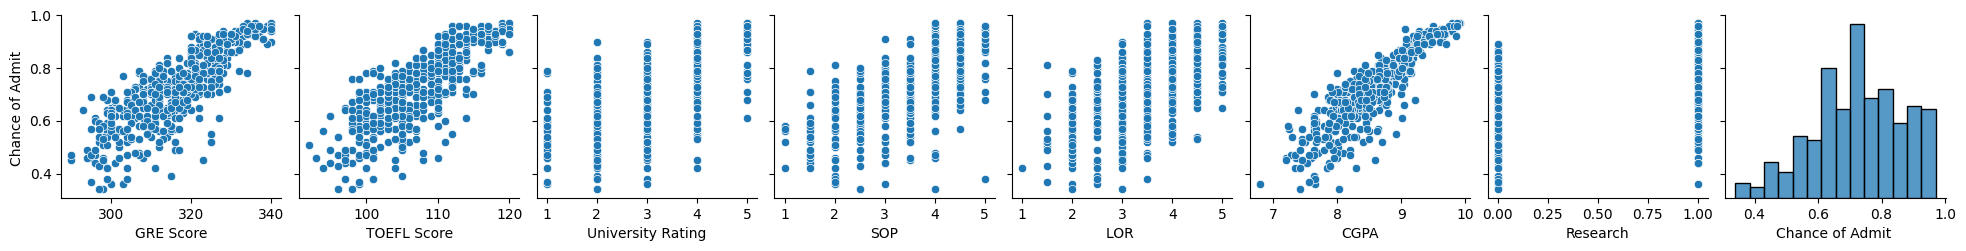

In [186]:
sns.pairplot(data=df, y_vars='Chance of Admit ')
plt.show()

### Data Preprocessing

In [187]:
X = df.drop('Chance of Admit ', axis = 1) # Only feature columns.
y = df['Chance of Admit '] # Target column.
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [188]:
X.shape

(500, 7)

In [189]:
y.shape

(500,)

### Data Standardization

In [190]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152
...,...,...,...,...,...,...,...
495,1.376126,0.132987,1.650957,1.137360,0.558125,0.734118,0.886405
496,1.819238,1.614278,1.650957,1.642404,1.639763,2.140919,0.886405
497,1.198882,2.108041,1.650957,1.137360,1.639763,1.627851,0.886405
498,-0.396319,-0.689952,0.775582,0.632315,1.639763,-0.242367,-1.128152


### Spliting the data into train and test datasets

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42)

### Linear Regression code from the Scratch

In [192]:
class LinearRegression_base:
  def __init__(self, learning_rate = 0.05, n_iters = 100): # On creation of linear regression object, this method initiates learning rate and number of iterations
    self.learning_rate = learning_rate
    self.n_iters = n_iters
    self.error = []
  def update_weights(self, y, y_pred, X):
    dw = (1 / self.m) * np.dot(X.T, (y_pred - y))
    db = (1 / self.m) * np.sum(y_pred - y)
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db
  def fit(self, X, y):
    self.m, self.n_features_in_ = X.shape
    self.w = np.zeros(self.n_features_in_)
    self.b = 0
    for _ in range(self.n_iters):
      y_pred = np.dot(X, self.w) + self.b
      self.error.append(np.mean((y - y_pred)**2))
      self.update_weights(y, y_pred, X)
  def predict(self, X):
    return np.dot(X, self.w) + self.b
  def score(self, X, y):
    y_pred = self.predict(X)
    u = np.mean((y - y_pred)**2)
    v = np.mean((y - np.mean(y))**2)
    return 1 - u/v


In [193]:
model = LinearRegression_base(n_iters=100)
model.fit(X_train, y_train)

Visualizing the error in each iteration.

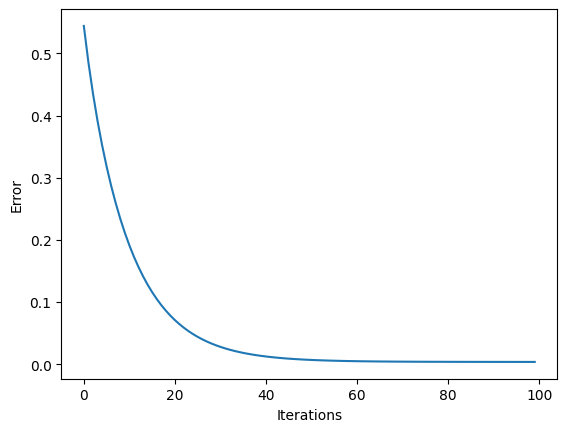

In [194]:
errors = model.error
iters = np.arange(len(errors))
plt.plot(iters, errors)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

**Insights:**
It could be seen that error saturated after 40 iterations.

In [195]:
model.predict(X_test)
model.score(X_train, y_train)

0.8162393331710451

In [196]:
model.score(X_test, y_test)

0.808070402059787

In [197]:
model.w # the magnitude of weight of each features tells the importance of that corresponding feature.

array([0.03456932, 0.02557977, 0.00442223, 0.00549374, 0.01649358,
       0.04998608, 0.0106103 ])

**Insights:**
After training the model for 100 iterations, the model is giving an R2 Score of 0.80 to 0.81.





### Using Scikitlearn library



In [198]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_train, y_train) # returns the trained model.

LinearRegression()

In [199]:
model.score(X_train, y_train)

0.8210671369321554

In [200]:
model.coef_

array([0.02746983, 0.01820228, 0.00293451, 0.00179558, 0.01593692,
       0.06798973, 0.01192658])

In [201]:
r2 = model.score(X_test, y_test)
r2

0.8188432567829629

**Insights:**

R2 score is almost as same as the previous model's. By analyzing the weight vector, we can conclude that GRE Score, TOEFL Score and CGPA are the important features in predicting the target variable.

### Linear Regression using OLS

In [202]:
X_train_new = sm.add_constant(X_train)
model_ols = sm.OLS(y_train, X_train_new)
results = model_ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Sun, 22 Dec 2024   Prob (F-statistic):          3.41e-142
Time:                        15:45:33   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.7228      0.003    240.717      0.000       0.717       0.729
GRE Score             0.0275      0.007      4.196      0.000       0.015       0.040
TOEFL Score           0.0182      0.006      3.174      0.002       0.007       0.029
University Rating     0.0029      0.005      0.611      0.541      -0.007       0.012
SOP                   0.0018      0.005      0.357      0.721      -0.008       0.012
LOR                   0.0159      0.004      3.761      0.000       0.008       0.024
CGPA                  0.0680      0.007     10.444      0.000       0.055       0.081
Research              0.0119      0.004      3.231      0.001       0.005       0.019
==============================================================================
Omnibus:                       86.232   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              190.099
Skew:                          -1.107   Prob(JB):                     5.25e-42
Kurtosis:                       5.551   Cond. No.                         5.72
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Calculating evaluation metrics.

In [203]:
def evaluation_metrics(y_actual, y_predicted):
  mse = np.mean((y_actual - y_predicted)**2)
  rmse = np.sqrt(mse)
  mae = np.mean(np.abs(y_actual - y_predicted))
  r2score = 1 - (np.sum((y_actual - y_predicted)**2) / np.sum((y_actual - np.mean(y_actual))**2))
  return mse, rmse, mae, r2score

In [204]:
# Calculating evaluation metrics for test data.
y_pred = model.predict(X_test)
mse, rmse, mae, r2score = evaluation_metrics(y_test, y_pred)

In [205]:
print(f'Mean Square Error :{mse}')
print(f'Root Mean Square Error :{rmse}')
print(f'Mean Absolute Error :{mae}')
print(f'R2 Score :{r2score}')

Mean Square Error :0.0037046553987884097
Root Mean Square Error :0.06086588041578311
Mean Absolute Error :0.04272265427705364
R2 Score :0.8188432567829629


### Assumptions of Linear Regression


1.   There should be linear relationship between features and target variable.
2.   Multicollinearity should not exist among features.
3.   Normality of residuals.
4.   Homoscedasticity



### Assumption 1: There should be linear relationship between features and target variable.

1.We can verify the relationship between fitted values and residuals by plotting a scatter plot. If a pattern is observed in the plot, it indicates that there is no linear relationship between the features and the target variable.

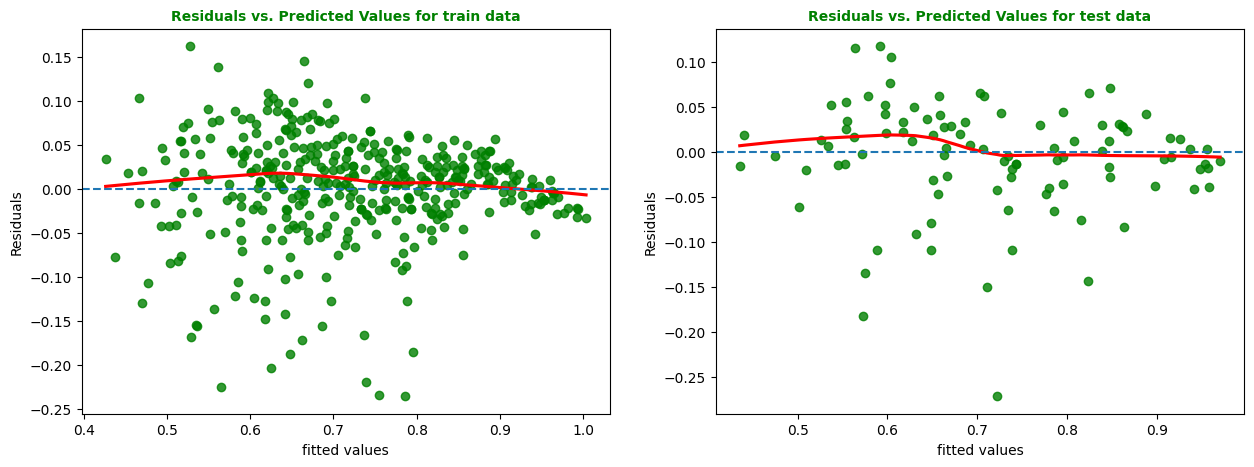

In [206]:
plt.figure(figsize=(15, 5))
#Plot1
plt.subplot(1, 2, 1)
plt.title('Residuals vs. Predicted Values for train data', fontsize = 10, fontweight = 'bold', color = 'green')
y_pred_train = model.predict(X_train)
residuals_train = y_train - y_pred_train
sns.regplot(x=y_pred_train, y=residuals_train, lowess=True, color='g',line_kws={'color': 'red'})
plt.xlabel('fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, linestyle = '--')
#Plot2
plt.subplot(1, 2, 2)
plt.title('Residuals vs. Predicted Values for test data', fontsize = 10, fontweight = 'bold', color = 'green')
y_pred_test = model.predict(X_test)
residuals_test = y_test - y_pred_test
sns.regplot(x=y_pred_test, y=residuals_test, lowess=True, color='g',line_kws={'color': 'red'})
plt.xlabel('fitted values')
plt.ylabel('Residuals')
plt.axhline(y=0, linestyle = '--')
plt.show()

**Insights:**
1. There is an insignificant pattern observed. At least we can expect a little bit of non-linearity in the data.

### Assumption 2: There should not be multicollinearity among the features.
1. Multicollinearity denotes when independent variables in a linear regression equation are correlated.
Correlation between two or more predictors creates difficulty in determining any one variable’s individual impact on the model output. Remember that a regression coefficient measures a given predictor variable’s effect on the output assuming other predictors remain constant. But if predictors are correlated, it may not be possible to isolate predictors. Thus, estimated regression coefficients for multicollinear variables do not reflect any one predictor’s effect on the output but rather the predictor’s partial effect, depending on which covariates are in the model

In [207]:
X = scaler.fit_transform(X)

In [208]:
vif = pd.DataFrame()
vif['Variable'] = df.iloc[::, :-1].columns
vif['VIF'] = [variance_inflation_factor(X_train, i) for i in range(X_train.shape[1])]
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Variable,VIF
5,CGPA,4.653698
0,GRE Score,4.489201
1,TOEFL Score,3.665067
3,SOP,2.785753
2,University Rating,2.571847
4,LOR,1.977668
6,Research,1.517206


**Insights:**
The higher value of VIF indicates that the corresponding variable can expressed as the linear combination of other variables. Here VIF's of every variable is less than 5, hence multicollinearlity does not exist.

### Assumption 3: Normality of residuals
Normality of residuals means that residuals are symmetric around 0 without skewness. It helps in determining the efficiency of the model and resistance of the model to the outliers.

In [209]:
# Calculating residuals
y_pred_train = model.predict(X_train)
residuals = y_train - y_pred_train

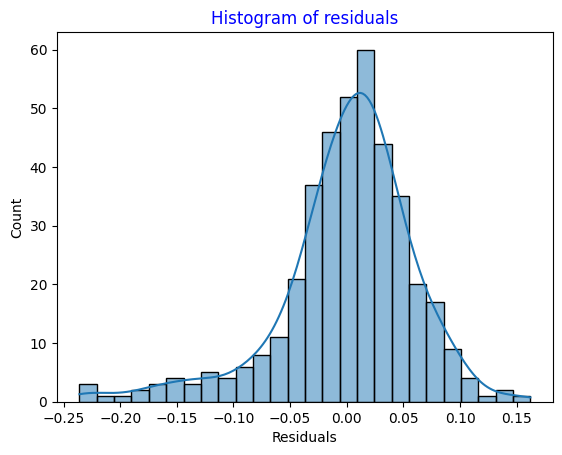

In [210]:
plt.title('Histogram of residuals', color = 'b')
plt.xlabel('Residuals')
sns.histplot(residuals, kde = True)
plt.show()

It seems that there is skewness in the residuals towards left. It can be proved statistically as well.

#### Normality of residuals can be verified using qq(quantile-quantile) plot

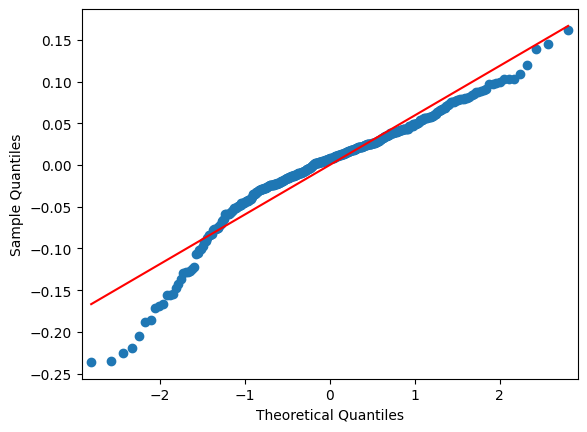

In [211]:
sm.qqplot(residuals, line = 's')
plt.show()

#### Using statistical methods

Null hypothesis:
Residuals are normally distributed.

Alternate hypothesis:
Residuals are not normally distributed.

In [212]:
statistic, pvalue = shapiro(residuals)
if pvalue > 0.05:
  print('Residuals are normally distributed')
else:
  print('Residuals are not normally distributed')

Residuals are not normally distributed


**Insights:**
By analyzing the above test results, we can conclude that the residuals are not normally distributed.

### Assumption 4: Homoscedacticity
Homoskedastic (also spelled "homoscedastic") refers to a condition in which the variance of the residual, or error term, in a regression model is constant. That is, the error term does not vary much as the value of the predictor variable changes. Another way of saying this is that the variance of the data points is roughly the same for all data points.

In [213]:
X = df.iloc[::, :-1]

Plotting residuals against each independent variable to verify variance of residuals across all values of independent variables.

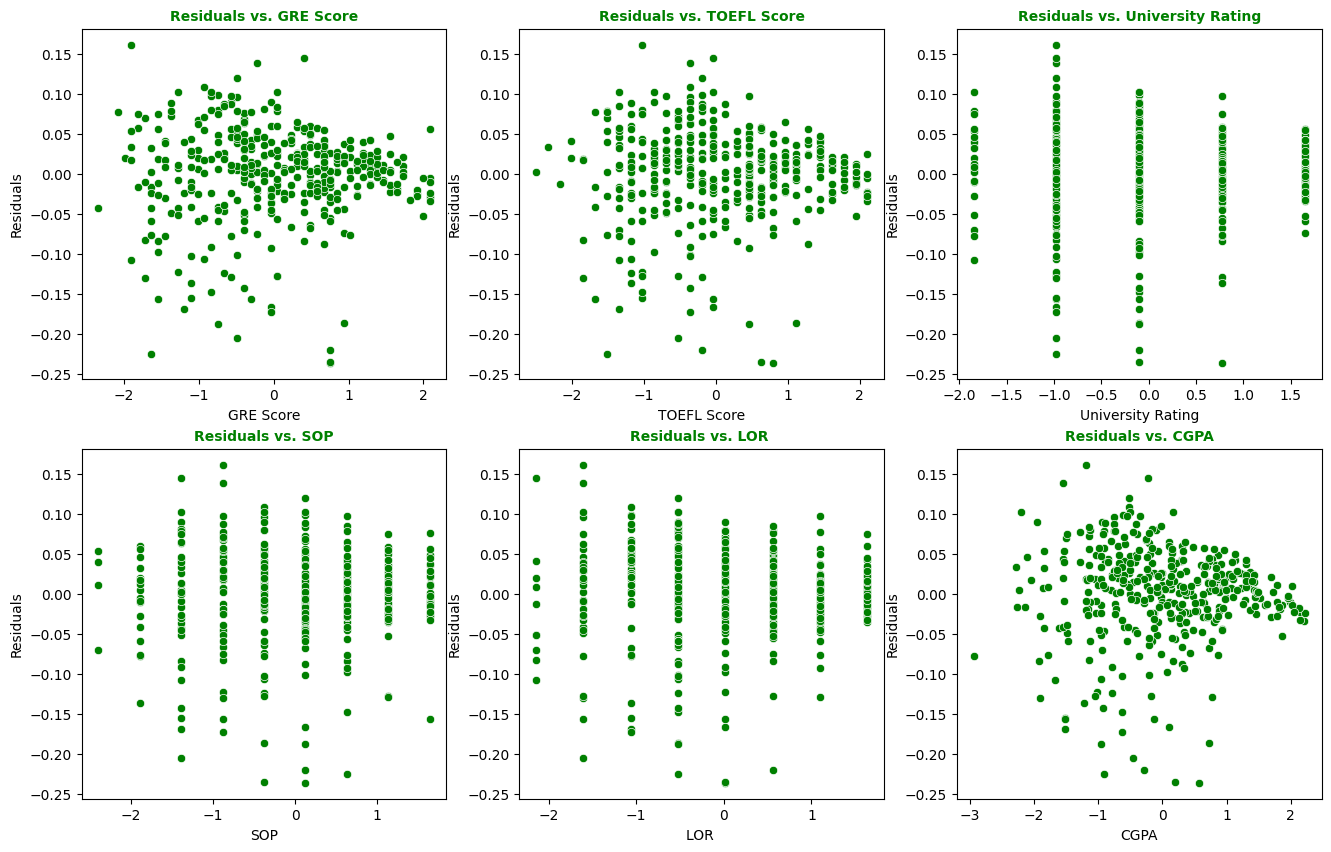

In [214]:
plt.figure(figsize=(16, 10))
y_pred = model.predict(X_train)
residuals = y_train - y_pred
for i in range(X_test.shape[1]-1):
  plt.subplot(2, 3, i+1)
  sns.scatterplot(x=X_train.iloc[:, i], y=residuals,color='g')
  plt.title(f'Residuals vs. {df.columns[i]}', fontsize = 10, fontweight = 'bold', color = 'green')
  plt.xlabel(df.columns[i])
  plt.ylabel('Residuals')

plt.show()

**Insights:**
It can be seen from the scatter plots that the homoscedacticity is not met.

### Polynomial regression

In [215]:
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
scaler = StandardScaler()
X_poly = pd.DataFrame(scaler.fit_transform(X_poly))
X_poly_train, X_poly_test, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 42)

In [216]:
model = sklearn.linear_model.LinearRegression()
model.fit(X_poly_train, y_train)

LinearRegression()

In [217]:
model.score(X_poly_train, y_train)

0.8357962945524069

In [218]:
model.score(X_poly_test, y_test)

0.8265115552643356

**Insights:**
The model's performance is slightly improved when degree = 2. This indicates the slightest non-linearity in the data.

### Regularization:
This technique prevents the model from over-fitting by controlling the weights of unnecessary features.


### Lasso Regularization

In [219]:
model = sklearn.linear_model.Lasso(alpha = 0.001, max_iter=1500) # alpha is a controlling factor of regularization term.
model.fit(X_poly_train, y_train)

Lasso(alpha=0.001, max_iter=1500)

In [220]:
model.score(X_poly_train, y_train)

0.8225709745072357

In [221]:
r2 = model.score(X_poly_test, y_test)

In [222]:
adj_r2 = 1 - (1-r2)*(len(y_train)-1)/(len(y_train)-X_poly_train.shape[1]-1)
adj_r2

0.8057009103538945

### Ridge Regression

In [223]:
model = sklearn.linear_model.Ridge(alpha = 0.01)
model.fit(X_poly_train, y_train)

Ridge(alpha=0.01)

In [224]:
model.score(X_poly_train, y_train)

0.8354271839697067

In [225]:
model.score(X_poly_test, y_test)

0.8280519942803857

### ElasticNet Regression
It is a combination of both Lasso and ridge regularization techniques.

In [226]:
model = sklearn.linear_model.ElasticNet(alpha = 0.001, l1_ratio = 0.2)
model.fit(X_poly_train, y_train)

ElasticNet(alpha=0.001, l1_ratio=0.2)

In [227]:
model.score(X_poly_train, y_train)

0.8266985209202545

In [228]:
model.score(X_poly_test, y_test)

0.8287847345666521

In [229]:
coef_df = pd.DataFrame(model.coef_, index = poly.get_feature_names_out(X.columns), columns = ['Coefficient'])

In [230]:
coef_df[coef_df['Coefficient']!=0].sort_values(by = 'Coefficient', ascending = False)

,Coefficient
CGPA,0.071327
University Rating SOP,0.051907
GRE Score,0.026131
LOR,0.020577
TOEFL Score,0.017815
University Rating Research,0.012468
SOP Research,0.006569
LOR Research,-0.003052
University Rating LOR,-0.009551
SOP^2,-0.022911



The above dataframe shows the importance of each feature in predicting the target variable.

### Final model
1. Feature engineering using polynomial features using degree 2.
2. Using Elasticnet regression to balance between overfitting and underfitting.

### Hyperparameters
1. Degree = 2
2. alpha = 0.001 and l1_ratio = 0.2 in Elasticnet

## Recommendations
1. It is advised to focus more on CGPA, GRE Score, and TOEFL for a better chance of admit in top universities.
2. Providing more data points helps in improving the performance of the model.
